In [ ]:
#Alessando Fossati

In [ ]:
#mat.819499

In [ ]:
#DataScience, assignement TIDS

In [ ]:
#1.PREPARAZIONE DEL DATASET E STATISTICHE DESCRITTIVE

In [1]:
import pyspark
import matplotlib.pyplot as plt
import numpy as np
import databricks.koalas as ks  #restituisce un warning dovuto alla gestione del conflitto pyarrow dentro koalas
import pandas as pd
from functools import reduce  
from pyspark.sql import DataFrame
import seaborn as sns

In [2]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("Assignment_tids").getOrCreate()
#spark.stop()  


In [3]:
#come primo passaggio si importano i fogli excel relativi ai risultati dei vari esperiementi
#e li si unisce con koalas, per poi creare un dataframe spark
pdf_a = ks.from_pandas(pd.read_excel('risultati_A.xlsx', sheet_name='detailed results', inferSchema='true'))
pdf_b = ks.from_pandas(pd.read_excel('risultati_B.xlsx', sheet_name='detailed results', inferSchema='true'))
pdf_c = ks.from_pandas(pd.read_excel('risultati_C.xlsx', sheet_name='detailed results', inferSchema='true'))
pdf_d = ks.from_pandas(pd.read_excel('risultati_D.xlsx', inferSchema='true'))
pdf_e = ks.from_pandas(pd.read_excel('risultati_E.xlsx', inferSchema='true'))
pdf_f = ks.from_pandas(pd.read_excel('risultati_F.xlsx', sheet_name='detailed results', inferSchema='true'))

pdf=ks.concat([pdf_a,pdf_b,pdf_c,pdf_d,pdf_e,pdf_f])
pdf.head()



,F1,F2,F3,F4,Rep,MODEL_OF,MODEL_OFUB,MODEL_TIME,CBC_OF,CBC_TIME,CBC_FC,CBC_PC,NEWCBC_OF,NEWCBC_TIME,NEWCBC_FC
0,3,400,9,A,1,197,197,0.290,197,0.02,0,1,197,0.056,0
1,3,400,9,A,2,162,162,0.240,162,0.02,0,0,162,0.016,0
2,3,400,9,A,3,165,165,0.850,165,0.01,0,0,165,0.023,0
3,3,400,6,A,4,178,178,0.311,178,0.02,0,1,178,0.012,0
4,3,400,9,A,5,220,220,0.720,220,0.03,0,1,220,0.038,0


In [4]:
type(pdf)  #dataframe koalas

databricks.koalas.frame.DataFrame

In [5]:
df = pdf.to_spark()  #convertiamo in dataframe spark per effettuare le statistiche descrittive

df.show(10)

+---+---+---+---+---+--------+----------+----------+------+--------+------+------+---------+-----------+---------+
| F1| F2| F3| F4|Rep|MODEL_OF|MODEL_OFUB|MODEL_TIME|CBC_OF|CBC_TIME|CBC_FC|CBC_PC|NEWCBC_OF|NEWCBC_TIME|NEWCBC_FC|
+---+---+---+---+---+--------+----------+----------+------+--------+------+------+---------+-----------+---------+
|  3|400|  9|  A|  1|     197|       197|      0.29|   197|    0.02|     0|     1|      197|      0.056|        0|
|  3|400|  9|  A|  2|     162|       162|      0.24|   162|    0.02|     0|     0|      162|      0.016|        0|
|  3|400|  9|  A|  3|     165|       165|      0.85|   165|    0.01|     0|     0|      165|      0.023|        0|
|  3|400|  6|  A|  4|     178|       178|     0.311|   178|    0.02|     0|     1|      178|      0.012|        0|
|  3|400|  9|  A|  5|     220|       220|      0.72|   220|    0.03|     0|     1|      220|      0.038|        0|
|  3|400|  7|  A|  6|     162|       162|     1.085|   162|    0.03|     0|     

In [6]:
from pyspark.sql.functions import col
from pyspark.sql.types import StringType
df = df.withColumn("F1",col("F1").cast(StringType()))  
#convertiamo in stringa la variabile F1, in quanto in quanto interpretabile come variabile categorica a 5 livelli

In [7]:
df.printSchema()
#long è un particolare tipo di integer, dunque non sembra che abbiamo altro da modificare

root
 |-- F1: string (nullable = false)
 |-- F2: long (nullable = false)
 |-- F3: long (nullable = false)
 |-- F4: string (nullable = false)
 |-- Rep: long (nullable = false)
 |-- MODEL_OF: long (nullable = false)
 |-- MODEL_OFUB: long (nullable = false)
 |-- MODEL_TIME: double (nullable = false)
 |-- CBC_OF: long (nullable = false)
 |-- CBC_TIME: double (nullable = false)
 |-- CBC_FC: long (nullable = false)
 |-- CBC_PC: long (nullable = false)
 |-- NEWCBC_OF: long (nullable = false)
 |-- NEWCBC_TIME: double (nullable = false)
 |-- NEWCBC_FC: long (nullable = false)



In [8]:
#STATISTICHE DESCRITTIVE

In [9]:
df.describe('MODEL_TIME','CBC_TIME','NEWCBC_TIME').show()
#si noti la netta disuguaglianza tra i tempi medi di computazione degli algoritmi, probabilmente dovuta al fatto che
#i valori massimi riscontrati nei primi due algoritmi siano decisamente alti, e forse anche inverosimili

+-------+-----------------+-----------------+-------------------+
|summary|       MODEL_TIME|         CBC_TIME|        NEWCBC_TIME|
+-------+-----------------+-----------------+-------------------+
|  count|              400|              400|                400|
|   mean|       293.390935|      254.8061825|0.19791249999999994|
| stddev|880.5823451249038|775.7127981301821|0.23503598581988636|
|    min|             0.08|             0.01|              0.011|
|    max|           3600.0|           3600.0|              1.562|
+-------+-----------------+-----------------+-------------------+



In [10]:
df.describe('MODEL_OF','CBC_OF','NEWCBC_OF').show()
#si noti la grande somiglianza in termini di media e varianza tra le variabili relative alla OF degli algoritimi
#questo faciliterà la fase di test successiva

+-------+------------------+------------------+-----------------+
|summary|          MODEL_OF|            CBC_OF|        NEWCBC_OF|
+-------+------------------+------------------+-----------------+
|  count|               400|               400|              400|
|   mean|          281.9075|          281.8625|           281.81|
| stddev|102.20495867468581|102.18639214984306|102.0867678517939|
|    min|                82|                82|               82|
|    max|               658|               658|              658|
+-------+------------------+------------------+-----------------+



In [11]:
from pyspark.sql.functions import col, skewness, kurtosis

df.select(skewness('MODEL_OF'),kurtosis('MODEL_OF')).show()
df.select(skewness('CBC_OF'),kurtosis('CBC_OF')).show()
df.select(skewness('NEWCBC_OF'),kurtosis('NEWCBC_OF')).show()  #valuta se fare per time

#si notano valori molto simili per asimmetria e curtosi tra le varie obj function dei modelli
#si notano valori positivi per entrambe le misure
#dal valore della asimmetria si nota come la coda della distribuzione di probabilità sarà spostata più verso destra (valore positivo)
#più il valore di curtosi si allontana dallo zero, più le code saranno "pesanti"


+------------------+------------------+
|skewness(MODEL_OF)|kurtosis(MODEL_OF)|
+------------------+------------------+
|0.7403895423730211|0.6606302471638288|
+------------------+------------------+

+------------------+------------------+
|  skewness(CBC_OF)|  kurtosis(CBC_OF)|
+------------------+------------------+
|0.7434884438864577|0.6678631709732343|
+------------------+------------------+

+-------------------+-------------------+
|skewness(NEWCBC_OF)|kurtosis(NEWCBC_OF)|
+-------------------+-------------------+
| 0.7415224764900218| 0.6733326442788319|
+-------------------+-------------------+



In [12]:
#valutiamo graficamente i dati

In [13]:
x_MOD_TIME=df.select('MODEL_TIME').rdd.map(lambda row : row.MODEL_TIME).collect()
x_CBC_TIME=df.select('CBC_TIME').rdd.map(lambda row : row.CBC_TIME).collect()
x_NEWCBC_TIME=df.select('NEWCBC_TIME').rdd.map(lambda row : row.NEWCBC_TIME).collect()

x_MOD_OF=df.select('MODEL_OF').rdd.map(lambda row : row.MODEL_OF).collect()
x_CBC_OF=df.select('CBC_OF').rdd.map(lambda row : row.CBC_OF).collect()
x_NEWCBC_OF=df.select('NEWCBC_OF').rdd.map(lambda row : row.NEWCBC_OF).collect()
y=df.select('F1').rdd.map(lambda row : row.F1).collect()

#in questo modo si riesce ad isolare le colonne che ci interessano dal dataframe spark, per poter fare delle
#analisi ed anche i test statistici successivamente

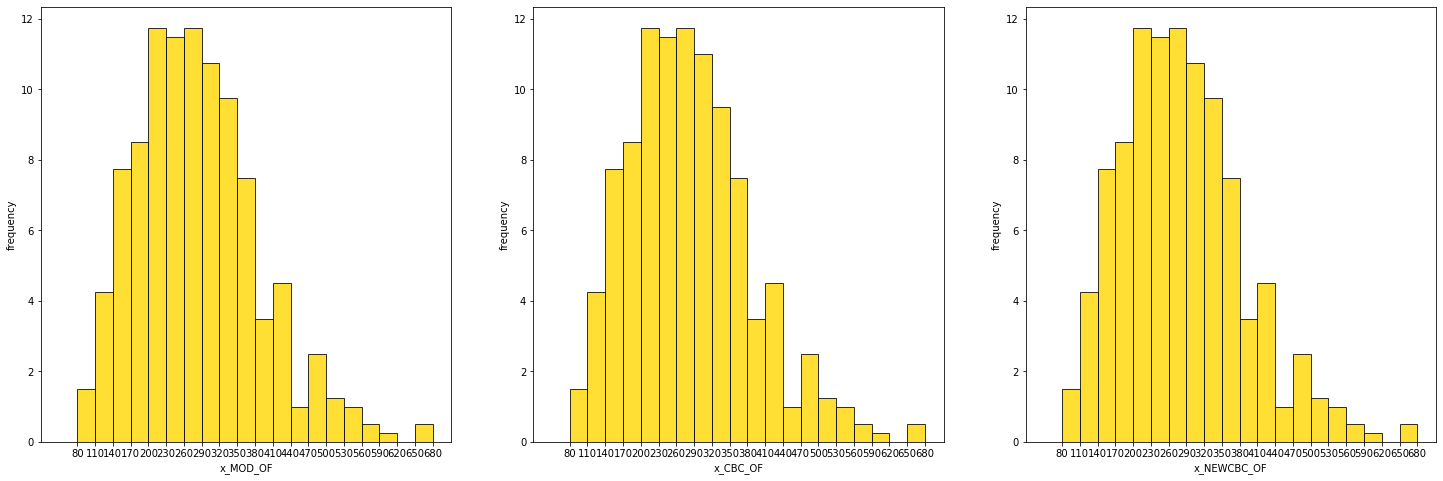

In [14]:
dic={'x_MOD_OF':x_MOD_OF,'x_CBC_OF':x_CBC_OF,'x_NEWCBC_OF':x_NEWCBC_OF}

bins=np.arange(50,700,30)
fig=plt.figure(figsize=(25,8))

n=1
for k,v in dic.items():
    
    hist, bin_edges =np.histogram(v,bins,weights=np.zeros_like(v)+ 100. /len(v))

    ax=fig.add_subplot(1,3,n)
    ax.bar(range(len(hist)),hist,width=1,alpha=0.8,ec='black',color='gold')
    ax.set_xticks([0.5+i for i,j in enumerate(hist)])

    labels =['{}'.format(int(bins[i+1])) for i,j in enumerate(hist)]
    ax.set_xticklabels(labels)
    plt.xlabel(k)
    plt.ylabel('frequency')
    
    n+= 1

plt.show()

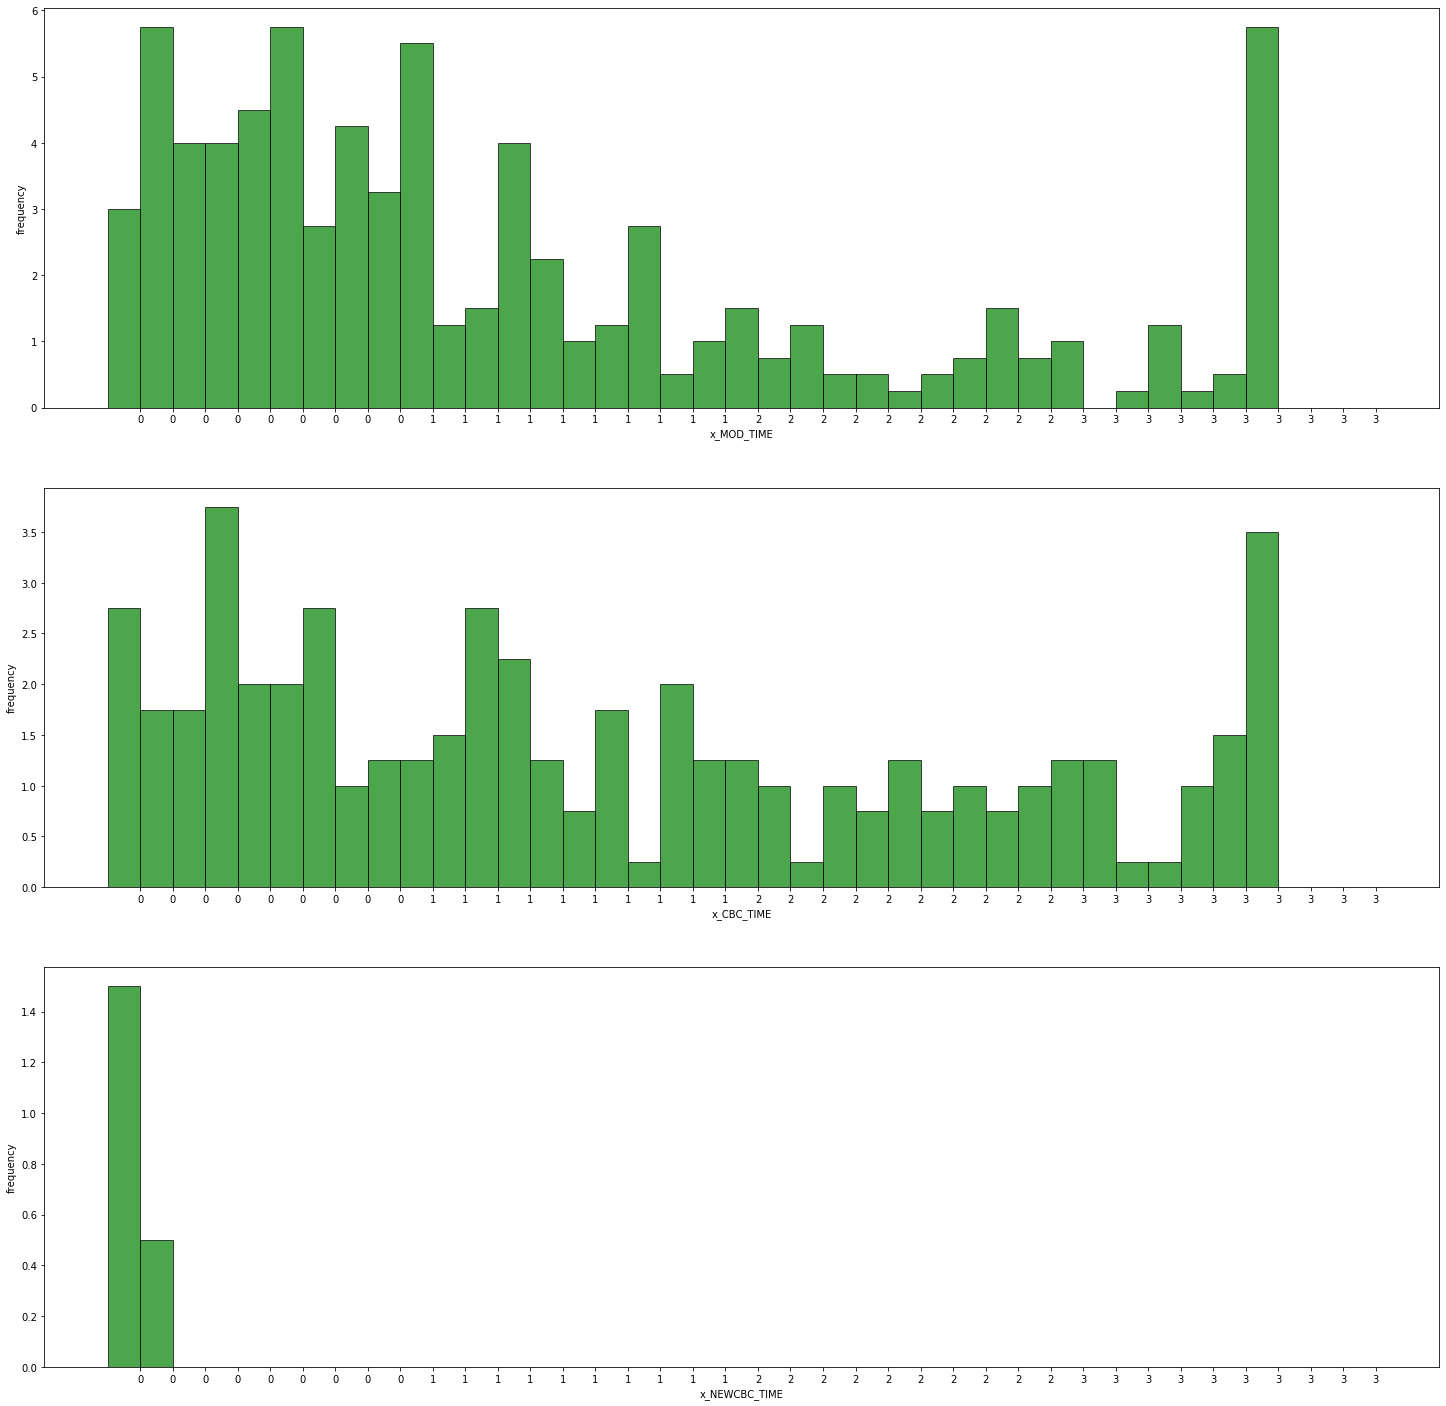

In [15]:
import numpy as np
x1=np.log10(x_MOD_TIME)
x2=np.log10(x_CBC_TIME)
x3=np.log10(x_NEWCBC_TIME)

dic={'x_MOD_TIME':x1,'x_CBC_TIME':x2,'x_NEWCBC_TIME':x3}

bins=np.arange(0,4,0.1)
fig=plt.figure(figsize=(25,25))

n=1
for k,v in dic.items():
    
    hist, bin_edges =np.histogram(v,bins,weights=np.zeros_like(v)+ 100. /len(v))

    ax=fig.add_subplot(3,1,n)
    ax.bar(range(len(hist)),hist,width=1,alpha=0.7,ec='black',color='green')
    ax.set_xticks([0.5+i for i,j in enumerate(hist)])

    labels =['{}'.format(int(bins[i+1])) for i,j in enumerate(hist)]
    ax.set_xticklabels(labels)
    plt.xlabel(k)
    plt.ylabel('frequency')
    
    n+= 1

plt.show() 

In [16]:
#analizzando i due gruppi di istogrammi, si evince un andamento gaussiano dal primo gruppo (objective function di
# tutti i tre algoritmi), a differenza dal secondo gruppo (relativo al tempo di esecuzione degli algoritmi)

In [17]:
#suddividiamo ora il dataset nei 4 gruppi di risultati, secondo la feature F4 (A,B,C,F)
df_a=df.filter(df.F4=='A')
df_b=df.filter(df.F4=='B')
df_c=df.filter(df.F4=='C')
df_f=df.filter(df.F4=='F')
#si escludono E e D in quanto hanno differenti condizioni

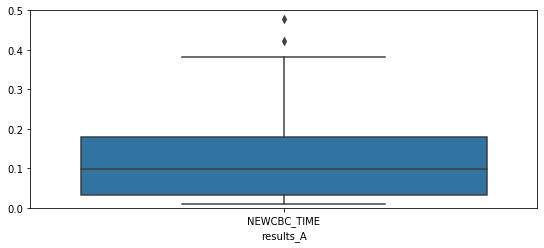

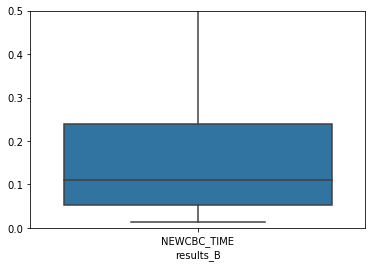

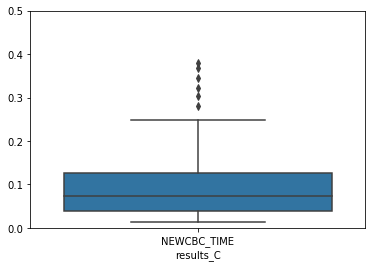

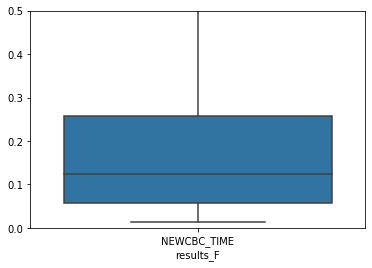

In [18]:
import matplotlib.pyplot as plt

#si analizzano i boxplot relativi al tempo di computazione dell'algoritmo NEWCBC, in quanto dalle
#analisi precedenti è risultato essere il migliore 

a = df_a.select('NEWCBC_TIME').toPandas()
b = df_b.select('NEWCBC_TIME').toPandas()
c = df_c.select('NEWCBC_TIME').toPandas()
f = df_f.select('NEWCBC_TIME').toPandas()

fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(2, 2, 1)
ax = sns.boxplot(data=a)
plt.xlabel('results_A')
plt.ylim(0,0.5)
plt.show()

bx = fig.add_subplot(2, 2, 2)
bx = sns.boxplot(data=b)
plt.xlabel('results_B')
plt.ylim(0,0.5)
plt.show()

cx = fig.add_subplot(2, 2, 3)
cx = sns.boxplot(data=c)
plt.xlabel('results_C')
plt.ylim(0,0.5)
plt.show()

fx = fig.add_subplot(2, 2, 4)
fx = sns.boxplot(data=f)
plt.xlabel('results_F')
plt.ylim(0,0.5)
plt.show()

#show plot


#si nota come tutti i tempi di computazione per l'algoritmo NEWCBC nei 4 gruppi di analisi considerati
#risultano molto simili in media, soprattutto per i gruppi A,B ed F. Il gruppo C risulta essere
#leggermente migliore degli altri, seppur presentando alcuni valori anomali in più rispetto agli altri

In [19]:
#PUNTO2: TEST PER EFFECTIVENESS DEGLI ALGORITMI

In [20]:

#con effectiveness di un algoritmo si intende la capacità che esso ha di fornire i risultati attesi, 
#quindi misura quanto buoni sono i suoi risultati

#si decide di effettuare un test ANOVA ad una via per la differenza di medie tra popolazioni:
#l’ipotesi alla base è che le osservazioni di ciascun blocco provengano da popolazioni che seguono
#una distribuzione normale con uguale varianza costante e con eventuale media diversa per alcune
#popolazioni.


#si decide per questa tipologia di test dal momento che dalle statistiche descrittive i valori delle medie
#e delle varianze risultano essere molto vicini



In [21]:
#check assunzioni

In [22]:
import scipy.stats as stats
w, pvalue = stats.bartlett(x_MOD_OF,x_CBC_OF,x_NEWCBC_OF)
print(w, pvalue)  #bartlett per test omoschedasticità

#omoschedasticità confermata dal momento che il p-value è molto vicino ad uno
#questo ci porta a non rifiutare l' H0: presenza di omoschedasticità (uguale varianza tra le popolazioni)

0.0006171626858153552 0.999691466263418


In [23]:
#normalità

import scipy.stats as sci

def kolmos(x_of):
    val=(x_of-np.mean(x_of))/np.std(x_of)
    print(sci.kstest(val,'norm'))
    
#definiamo questa funzione in quanto la useremo più volte

In [24]:
kolmos(x_MOD_OF) 
kolmos(x_CBC_OF) 
kolmos(x_NEWCBC_OF)  

#i risultati del kolmogorov test per le objective function dei tre algoritmi forniscono risultati soddisfacenti
#come si evince dal pvalue lontano da zero. Anche con un valore piccolo di livello di significatività alfa, possiamo
#non rifiutare l'H0: dati per Of degli algoritmi provenienti da popolazioni gaussiane

#la normalità poteva anche essere evinta solamente guardando gli istogrammi nella sezione statistiche descrittive

KstestResult(statistic=0.056732976986455075, pvalue=0.1466042846478776)
KstestResult(statistic=0.05655028376444238, pvalue=0.14907215558115136)
KstestResult(statistic=0.05630385773371849, pvalue=0.15245393870965315)


In [25]:
#dunque le assunzioni sono rispettate, si può effettuare il test:

In [26]:
#test  ANOVA AD UNA VIA

#H0: valore medio di OF dei tre algoritmi approssimativamente uguale
#H1: almeno una media è diversa

import scipy.stats as stats
import numpy as np
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(x_MOD_OF,x_CBC_OF,x_NEWCBC_OF)  #con fvalue si indica la statistica test di fisher del test anova d una via
print(fvalue, pvalue) 

# il pvalue del test ci indiuce a non rifiutare l'ipotesi nulla del test, dunque come da pronostico
#gli algoritmi risultano essere approssimativamente equivalenti in quanto a valore medio di funzione obiettivo restituita

9.126587788022899e-05 0.9999087382936496


In [27]:
#PUNTO3: TEST PER EFFICIENCY DEGLI ALGORITMI

In [28]:
#gli istogrammi presentati al punto 1 dell'assignement lasciano dei dubbi sulla normalità delle popolazioni di provenienzxa dei dati
#dunque vengono controllate:

In [29]:
#valutiamo la normalità con ks test
kolmos(x_MOD_TIME)
kolmos(x_CBC_TIME)
kolmos(x_NEWCBC_TIME)
#normalità rifiutata nettamente

KstestResult(statistic=0.43254385843408105, pvalue=1.5548647892293087e-68)
KstestResult(statistic=0.4135086852762027, pvalue=2.050116267773224e-62)
KstestResult(statistic=0.21294438927509368, pvalue=2.138962482527853e-16)


In [30]:
#test omoschedasticità
w, pvalue = stats.bartlett(x_MOD_TIME,x_CBC_TIME,x_NEWCBC_TIME)
print(w, pvalue)

#omoschedasticità rifiutata nettamente

6033.3643237317165 0.0


In [31]:
#non essendo rispettate le condizioni, non si può effettuare ancora il test ANOVA, duqnue si opta per il test:

In [32]:
#test differenza medie popolazioni non normali ed eteroschedastiche:


In [33]:
#impostiamo il quantile della normale di riferimento per valutare la riuscita del test:

import scipy.stats as st
st.norm.ppf(.95) #normale standard alfa=0.05

1.6448536269514722

In [34]:
def z(x1,x2):
    z = (np.mean(x1)-np.mean(x2))/np.sqrt((np.var(x1)/400)+(np.var(x2)/400))
    #stat test utilizzata in caso di non normalità ed eterosched. delle popolazioni di riferimento
    #sotto H0 è approssimabile come una normale standard dal momento che la numerosità campionaria = 400 (grande)
    print(z)
    return z
#impostiamo una funzione per calcolare la statistica test sotto ipotesi nulla nei tre vari test

In [35]:
#H0: differenza tra le medie di tempo computazionale impiegato per fornire risultati dagli algoritmi 
#MODEL e CBC = 0

#H1: differenza tra le medie di tempo computazionale impiegato per fornire risultati dagli algoritmi 
#MODEL e CBC > 0

Z_1 = z(x_MOD_TIME,x_CBC_TIME)

#essendo il valore della statistica test minore del quantile della normale (1.64), non rifiutiamo H0, dunque non vi
#è differenza nello scegliere uno o l'altro algoritmo in base al tempo di computazione

0.6584120252610547


In [36]:
#H0: differenza tra le medie di tempo computazionale impiegato per fornire risultati dagli algoritmi 
#MODEL e NEWCBC = 0

#H1: differenza tra le medie di tempo computazionale impiegato per fornire risultati dagli algoritmi 
#MODEL e NEWCBC > 0

Z_2 = z(x_MOD_TIME,x_NEWCBC_TIME)

#essendo il valore della statistica test ampiamente maggiore del quantile della normale (1.64),rifiutiamo H0
# e dunque accettiamo che il tempo medio di computazione per MODEL sia nettamente maggiore del tempo di NEWCBC
#dunque NEWCBC è migliore di MODEL


6.667410346176009


In [37]:
#H0: differenza tra le medie di tempo computazionale impiegato per fornire risultati dagli algoritmi 
#CBC e NEWCBC = 0

#H1: differenza tra le medie di tempo computazionale impiegato per fornire risultati dagli algoritmi 
#CBC e NEWCBC > 0

Z_3 = z(x_CBC_TIME,x_NEWCBC_TIME)

#essendo il valore della statistica test ampiamente maggiore del quantile della normale (1.64),rifiutiamo H0
# e dunque accettiamo che il tempo medio di computazione per CBC sia nettamente maggiore del tempo di NEWCBC
#dunque NEWCBC è migliore di CBC

6.572719110326601


In [38]:
#dunque NEWCBC in base al tempo computazionale è migliore degli altri due algoritmi

In [39]:
#bisogna tenere conto del fatto che esistono alcuni outlier che potrebbero influenzare certamente le analisi
#di questo secondo test. Tuttavia non conoscendo a fondo il contesto di analisi e non avendo sufficienti
#prove per dimostarre che si tratti effettivamente di errori di battitura, si preferisce lasciare così le cose


In [40]:
#PUNTO4: REGRESSIONE LINEARE E ANALISI CORRELAZIONE TRA VARIABILI DI INPUT E DI OUTPUT

In [41]:
kdf=df.to_koalas() #si converte  il file spark in koalas e si effettuano alcune operazione per ottenere una sorta
#di matrice di correlazione, con a sinistra le variabili di input e in alto nella tabella quelle di output. 
corr=ks.DataFrame.corr(kdf)
corr=corr.drop(['F2','F3','Rep'],axis=1)
corr=corr.iloc[0:3,:]
corr

#ad ogni modo non spicca nessuna correlazione in particolare tra le varibili di input ed output, ad indicare 
#che nessuna variabile numerica di input influenza in maniera netta nessuna delle variabili di output

,MODEL_OF,MODEL_OFUB,MODEL_TIME,CBC_OF,CBC_TIME,CBC_FC,CBC_PC,NEWCBC_OF,NEWCBC_TIME,NEWCBC_FC
F2,0.540895,0.572436,0.583499,0.540677,0.584216,0.297691,0.444480,0.539737,0.534790,None
F3,0.628034,0.659081,0.577608,0.627819,0.583315,0.346445,0.451041,0.627523,0.524556,None
Rep,-0.168373,-0.183636,-0.269951,-0.166947,-0.281157,-0.167943,-0.219248,-0.168601,-0.293570,None


In [42]:
#a questo punto entraimo nel vivo della modellazione per capire l'impatto delle features di input sulla variabili
#di input relative al TIME, tempo di computazione degli algoritmi:

In [43]:
df_prova=df 
#estraiamo le colonne di output di interesse dal dataset spark iniziale:
df_prova.show()


+---+---+---+---+---+--------+----------+----------+------+--------+------+------+---------+-----------+---------+
| F1| F2| F3| F4|Rep|MODEL_OF|MODEL_OFUB|MODEL_TIME|CBC_OF|CBC_TIME|CBC_FC|CBC_PC|NEWCBC_OF|NEWCBC_TIME|NEWCBC_FC|
+---+---+---+---+---+--------+----------+----------+------+--------+------+------+---------+-----------+---------+
|  3|400|  9|  A|  1|     197|       197|      0.29|   197|    0.02|     0|     1|      197|      0.056|        0|
|  3|400|  9|  A|  2|     162|       162|      0.24|   162|    0.02|     0|     0|      162|      0.016|        0|
|  3|400|  9|  A|  3|     165|       165|      0.85|   165|    0.01|     0|     0|      165|      0.023|        0|
|  3|400|  6|  A|  4|     178|       178|     0.311|   178|    0.02|     0|     1|      178|      0.012|        0|
|  3|400|  9|  A|  5|     220|       220|      0.72|   220|    0.03|     0|     1|      220|      0.038|        0|
|  3|400|  7|  A|  6|     162|       162|     1.085|   162|    0.03|     0|     

In [44]:
df_prova_out=df_prova.select([
 'MODEL_TIME',
 'CBC_TIME',
 'NEWCBC_TIME'])

df_prova_out.show()

+----------+--------+-----------+
|MODEL_TIME|CBC_TIME|NEWCBC_TIME|
+----------+--------+-----------+
|      0.29|    0.02|      0.056|
|      0.24|    0.02|      0.016|
|      0.85|    0.01|      0.023|
|     0.311|    0.02|      0.012|
|      0.72|    0.03|      0.038|
|     1.085|    0.03|      0.014|
|      1.58|    0.05|      0.092|
|      0.11|    0.02|      0.016|
|      0.58|    0.05|      0.031|
|      0.19|    0.05|      0.074|
|      0.95|    0.04|      0.018|
|       1.3|    0.44|      0.084|
|      0.61|    0.06|       0.03|
|      0.52|   0.074|      0.047|
|     1.427|    0.02|      0.062|
|      0.25|    0.02|      0.016|
|      0.16|    0.02|      0.019|
|      1.14|    0.11|      0.116|
|      0.85|    0.36|      0.091|
|      0.11|    0.01|      0.011|
+----------+--------+-----------+
only showing top 20 rows



In [45]:
#gestione outlier:

#ci si accorge della presenza di molti outlier nelle distribuzioni delle variabili time, dunque, a fini della modellazione si decide 
#di effettuarne una pulizia, per ottenere risultati più interpretabili:

In [46]:
bounds = {
    c: dict(
        zip(["q1", "q3"], df_prova_out.approxQuantile(c, [0.25, 0.75], 0))
    )
    for c in df_prova_out.columns
}

for c in bounds:
    iqr = bounds[c]['q3'] - bounds[c]['q1']
    bounds[c]['lower'] = bounds[c]['q1'] - (iqr * 1.5)
    bounds[c]['upper'] = bounds[c]['q3'] + (iqr * 1.5)
print(bounds)

#in questo chunk di codice vengono calcolati per ognuna delle variabili di output, che saranno le varibili risposta
#delle regressioni, i valori di riferimento per decidere quali osservazioni a loro appartenenti sono outliers

{'MODEL_TIME': {'q1': 1.02, 'q3': 20.808, 'lower': -28.662000000000003, 'upper': 50.49}, 'CBC_TIME': {'q1': 0.09, 'q3': 20.569, 'lower': -30.6285, 'upper': 51.287499999999994}, 'NEWCBC_TIME': {'q1': 0.047, 'q3': 0.26, 'lower': -0.2725, 'upper': 0.5795}}


In [47]:
import pyspark.sql.functions as f
df_prova_out=df_prova_out.select(
    "*",
    *[
        f.when(
            f.col(c).between(bounds[c]['lower'], bounds[c]['upper']),
            0
        ).otherwise(1).alias(c+"_out") 
        for c in df_prova_out.columns
    ]
)

#mediante questa operazione di select appendiamo al dataset prova_out altre tre colonne nelle quali si indicano
#gli outliers per ogni colonna delle variabili output. Si indica con 1 se una osservazione è outlier, con 0 se invece 
#la obs non è un outlier.

#risulta dunque utile tenere solamente le osservazioni che non sono outlier


In [48]:
df_prova_out.show()

+----------+--------+-----------+--------------+------------+---------------+
|MODEL_TIME|CBC_TIME|NEWCBC_TIME|MODEL_TIME_out|CBC_TIME_out|NEWCBC_TIME_out|
+----------+--------+-----------+--------------+------------+---------------+
|      0.29|    0.02|      0.056|             0|           0|              0|
|      0.24|    0.02|      0.016|             0|           0|              0|
|      0.85|    0.01|      0.023|             0|           0|              0|
|     0.311|    0.02|      0.012|             0|           0|              0|
|      0.72|    0.03|      0.038|             0|           0|              0|
|     1.085|    0.03|      0.014|             0|           0|              0|
|      1.58|    0.05|      0.092|             0|           0|              0|
|      0.11|    0.02|      0.016|             0|           0|              0|
|      0.58|    0.05|      0.031|             0|           0|              0|
|      0.19|    0.05|      0.074|             0|           0|   

In [49]:
kdf_new=df_prova_out.to_koalas() 

#convertiamo in koalas per permettere la merge tra il dataset di prova ed il dataset
#iniziale, cosi da pulire tutto il dataset iniziale dove serve dagli outlier

In [50]:
new_df = kdf.merge(kdf_new, on=['MODEL_TIME', 'CBC_TIME', 'NEWCBC_TIME'], how='inner')

In [51]:
new_df.head(10)

,F1,F2,F3,F4,Rep,MODEL_OF,MODEL_OFUB,MODEL_TIME,CBC_OF,CBC_TIME,CBC_FC,CBC_PC,NEWCBC_OF,NEWCBC_TIME,NEWCBC_FC,MODEL_TIME_out,CBC_TIME_out,NEWCBC_TIME_out
0,20,600,9,D,1,251,261,3600.000,251,3600.000,1,1,251,1.073,0,1,1,1
1,10,400,7,C,2,195,195,0.240,195,0.030,0,0,195,0.048,0,0,0,0
2,3,400,7,C,4,187,187,0.860,187,0.010,0,0,187,0.022,0,0,0,0
3,3,600,9,F,2,264,264,2.040,264,1.680,0,1,264,0.021,0,0,0,0
4,3,600,12,F,8,340,340,4.850,340,0.300,0,1,340,0.120,0,0,0,0
5,3,600,12,C,9,475,475,7.437,475,3.009,0,3,475,0.159,0,0,0,0
6,5,500,10,B,10,438,438,6.990,438,4.596,0,1,438,0.172,0,0,0,0
7,10,500,8,F,2,232,232,28.775,232,20.759,0,7,232,0.223,0,0,0,0
8,10,600,10,B,9,337,337,512.083,337,2475.750,0,48,337,0.334,0,1,1,0
9,5,600,10,C,2,323,323,0.280,323,0.090,0,0,323,0.040,0,0,0,0


In [52]:
#ora ci creiamo i dataframe per la regressione lineare

In [53]:
reg1=new_df.iloc[:,[0,1,2,3,4,7,15]]  #selezioniamo solamente le colonne di interesse dal dataframe new_df
reg1=reg1[reg1.MODEL_TIME_out==0]    #escludiamo gli outliers selezionando solo i valori non outlier
reg_1=reg1.drop('MODEL_TIME_out',axis=1) #droppiamo la varibile ausiliaria che non ci serve più
reg_1.head()

,F1,F2,F3,F4,Rep,MODEL_TIME
1,10,400,7,C,2,0.240
2,3,400,7,C,4,0.860
3,3,600,9,F,2,2.040
4,3,600,12,F,8,4.850
5,3,600,12,C,9,7.437


In [54]:
reg2=new_df.iloc[:,[0,1,2,3,4,9,16]]
reg2=reg2[reg2.CBC_TIME_out==0]
reg_2=reg2.drop('CBC_TIME_out',axis=1)
reg_2.head()
#si ripetono le stesse operazioni di sopra e lo stesso si fa anche sotto

,F1,F2,F3,F4,Rep,CBC_TIME
1,10,400,7,C,2,0.030
2,3,400,7,C,4,0.010
3,3,600,9,F,2,1.680
4,3,600,12,F,8,0.300
5,3,600,12,C,9,3.009


In [55]:
reg3=new_df.iloc[:,[0,1,2,3,4,13,17]]
reg3=reg3[reg3.NEWCBC_TIME_out==0]
reg_3=reg3.drop('NEWCBC_TIME_out',axis=1)
reg_3.head()

,F1,F2,F3,F4,Rep,NEWCBC_TIME
1,10,400,7,C,2,0.048
2,3,400,7,C,4,0.022
3,3,600,9,F,2,0.021
4,3,600,12,F,8,0.120
5,3,600,12,C,9,0.159


In [56]:
#otterremo dunque 3 regressioni, ognuna relativa ad una delle tre variabili di output relative al tempo di computazione

In [57]:
reg_1['MODEL_TIME']=np.log(reg_1['MODEL_TIME'])
reg_2['CBC_TIME']=np.log(reg_2['CBC_TIME'])
reg_3['NEWCBC_TIME']=np.log(reg_3['NEWCBC_TIME'])

#decidiamo di logaritmizzare i valori delle colonne di output in quanto risultano essere non normali anche dopo 
#la rimozione degli outliers. Con il logaritmo invece otteniamo valori riconducibili ad una popolazione normale
#il chè ci permette una migliore modellazione lineare

In [58]:
#una volta terminate le operazioni con koalas, torniamo ad avere a che fare con dataframe spark per affrontare la 
#regressione lineare sfruttando librerie Spark

reg_mod=reg_1.to_spark()
reg_cbc=reg_2.to_spark()
reg_new=reg_3.to_spark()



In [59]:
#test normalità dopo logaritmo:
prova=reg_mod.select('MODEL_TIME').rdd.map(lambda row : row.MODEL_TIME).collect()
kolmos(prova)

#si accetta per tutte la normalità ora

KstestResult(statistic=0.054477003655805656, pvalue=0.28022067363653486)


In [60]:
prova=reg_cbc.select('CBC_TIME').rdd.map(lambda row : row.CBC_TIME).collect()
kolmos(prova)

KstestResult(statistic=0.08672362954080087, pvalue=0.016201222330483368)


In [61]:
prova=reg_new.select('NEWCBC_TIME').rdd.map(lambda row : row.NEWCBC_TIME).collect()
kolmos(prova)

KstestResult(statistic=0.05087355903708812, pvalue=0.27896714762751246)


In [ ]:
#REGRESSIONE LINEARE CON VARIABILI RISPOSTA RELATIVE ALL'EXECUTION TIME

In [ ]:
#MODEL_TIME variabile risposta

In [62]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoderEstimator

indexer = StringIndexer(inputCol="F1", outputCol="F1_idx")
indexed = indexer.fit(reg_mod).transform(reg_mod)
indexer = StringIndexer(inputCol="F4", outputCol="F4_idx")
indexed = indexer.fit(indexed).transform(indexed)

encoder = OneHotEncoderEstimator(inputCols=['F1_idx','F4_idx'], outputCols=["F1_category", "F4_category"])
new_df=encoder.fit(indexed).transform(indexed)

#il codice di questo chunk è finalizzato a categorizzare le variabili di input F1 ed F4, per una migliore analisi
#esse infatti sono tranquillamente riconducibili a variabili factor, sfruttando onehot encoding

In [63]:
new_df.show(30)

+---+---+---+---+---+--------------------+------+------+-------------+-------------+
| F1| F2| F3| F4|Rep|          MODEL_TIME|F1_idx|F4_idx|  F1_category|  F4_category|
+---+---+---+---+---+--------------------+------+------+-------------+-------------+
| 10|400|  7|  C|  2| -1.4271163556401458|   2.0|   0.0|(3,[2],[1.0])|(4,[0],[1.0])|
|  3|400|  7|  C|  4|-0.15082288973458366|   0.0|   0.0|(3,[0],[1.0])|(4,[0],[1.0])|
|  3|600|  9|  F|  2|   0.712949807856125|   0.0|   2.0|(3,[0],[1.0])|(4,[2],[1.0])|
|  3|600| 12|  F|  8|  1.5789787049493917|   0.0|   2.0|(3,[0],[1.0])|(4,[2],[1.0])|
|  3|600| 12|  C|  9|  2.0064675417211633|   0.0|   0.0|(3,[0],[1.0])|(4,[0],[1.0])|
|  5|500| 10|  B| 10|   1.944480556245719|   1.0|   3.0|(3,[1],[1.0])|(4,[3],[1.0])|
| 10|500|  8|  F|  2|   3.359506954607946|   2.0|   2.0|(3,[2],[1.0])|(4,[2],[1.0])|
|  5|600| 10|  C|  2| -1.2729656758128873|   1.0|   0.0|(3,[1],[1.0])|(4,[0],[1.0])|
|  5|400|  9|  B|  7|  1.9090979616452883|   1.0|   3.0|(3,[1],[1

In [64]:
#in questo chunk prepariamo il dataset alla regressione, sfruttando il vector assembler della libreria ml.feature

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression



vectorAssembler = VectorAssembler(inputCols = ['F1_category','F2','F3','F4_category','Rep'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(new_df)
vhouse_df = vhouse_df.select(['features', 'MODEL_TIME'])
vhouse_df.show(3)

+--------------------+--------------------+
|            features|          MODEL_TIME|
+--------------------+--------------------+
|(10,[2,3,4,5,9],[...| -1.4271163556401458|
|(10,[0,3,4,5,9],[...|-0.15082288973458366|
|(10,[0,3,4,7,9],[...|   0.712949807856125|
+--------------------+--------------------+
only showing top 3 rows



In [70]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='MODEL_TIME', maxIter=13, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(vhouse_df)
print("Coefficients: " + str(np.exp(lr_model.coefficients)))  
print("Intercept: " + str(np.exp(lr_model.intercept)))

#sfruttiamo l'esponenziale in quanto la variabile risposta è di tipo logaritmico, dunque dobbiamo riportarei risultati
#alla realtà per favorire l'interpretazione di essi

#interpretazione:
#risulta interessante analizzare come nel passare dalla modalità baseline (F1=15) della variabile F1 alle altre sue modalità
#(F1 = 3,5,10) si evince come aumenti l'incisività della variabile F1 sulla variabile risposta Model_TIME. I coefficienti 
#relativi alla variabile F1 sono i primi 3, e si può evincere nel codice sottostante quali siano le baseline delle
#variabili categoriali: per F1 la baseline è 15, mentre per la F4, la baseline è D


Coefficients: [0.60243616 1.         1.26212785 1.00273882 1.         0.34807312
 1.         1.02796895 1.056305   1.        ]
Intercept: 0.8833776354834825


In [71]:
o=lr_model.transform(vhouse_df).select('features')
features=o.select('features').rdd.map(lambda row : row.features).collect()
features

#questo chunk serve per capire come sono le features nel dataframe. Permette di effettuare commenti sulle variabili
#factor del modello, e ci permette di capire che la baseline per F1 è =20 e la baseline per F4 è uguale a D

[SparseVector(10, {2: 1.0, 3: 400.0, 4: 7.0, 5: 1.0, 9: 2.0}),
 SparseVector(10, {0: 1.0, 3: 400.0, 4: 7.0, 5: 1.0, 9: 4.0}),
 SparseVector(10, {0: 1.0, 3: 600.0, 4: 9.0, 7: 1.0, 9: 2.0}),
 SparseVector(10, {0: 1.0, 3: 600.0, 4: 12.0, 7: 1.0, 9: 8.0}),
 SparseVector(10, {0: 1.0, 3: 600.0, 4: 12.0, 5: 1.0, 9: 9.0}),
 SparseVector(10, {1: 1.0, 3: 500.0, 4: 10.0, 8: 1.0, 9: 10.0}),
 SparseVector(10, {2: 1.0, 3: 500.0, 4: 8.0, 7: 1.0, 9: 2.0}),
 SparseVector(10, {1: 1.0, 3: 600.0, 4: 10.0, 5: 1.0, 9: 2.0}),
 SparseVector(10, {1: 1.0, 3: 400.0, 4: 9.0, 8: 1.0, 9: 7.0}),
 SparseVector(10, {0: 1.0, 3: 400.0, 4: 6.0, 7: 1.0, 9: 4.0}),
 SparseVector(10, {2: 1.0, 3: 400.0, 4: 9.0, 6: 1.0, 9: 3.0}),
 SparseVector(10, {2: 1.0, 3: 400.0, 4: 8.0, 5: 1.0, 9: 7.0}),
 SparseVector(10, {0: 1.0, 3: 600.0, 4: 10.0, 7: 1.0, 9: 6.0}),
 SparseVector(10, {2: 1.0, 3: 600.0, 4: 12.0, 5: 1.0, 9: 5.0}),
 SparseVector(10, {2: 1.0, 3: 500.0, 4: 8.0, 6: 1.0, 9: 5.0}),
 SparseVector(10, {1: 1.0, 3: 500.0, 4: 9.0, 8: 

In [72]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

#l' R quadro risulta essere basso, a documento del fatto che sono il 36% della variabilità della risposta venga spiegato
#dalle covariate di input. In generale non ci si può ritenere del tutto soddisfatti della modellazione lineare ottenuta
#in questo ambito, nonostante gli accorgimenti presi (gestione outlier e sistemazione normalità)

RMSE: 1.253903
r2: 0.359662


In [ ]:
#CBC_TIME variabile risposta

In [74]:
#in questo chunk prepariamo il dataset alla regressione, sfruttando il vector assembler della libreria ml.feature

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

indexer = StringIndexer(inputCol="F1", outputCol="F1_idx")
indexed = indexer.fit(reg_cbc).transform(reg_cbc)
indexer = StringIndexer(inputCol="F4", outputCol="F4_idx")
indexed = indexer.fit(indexed).transform(indexed)

encoder = OneHotEncoderEstimator(inputCols=['F1_idx','F4_idx'], outputCols=["F1_category", "F4_category"])
new_df=encoder.fit(indexed).transform(indexed)

#il codice di questo chunk è finalizzato a categorizzare le variabili di input F1 ed F4, per una migliore analisi
#esse infatti sono tranquillamente riconducibili a variabili factor, sfruttando onehot encoding

vectorAssembler = VectorAssembler(inputCols = ['F1_category','F2','F3','F4_category','Rep'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(new_df)
vhouse_df = vhouse_df.select(['features', 'CBC_TIME'])
vhouse_df.show(3)

+--------------------+------------------+
|            features|          CBC_TIME|
+--------------------+------------------+
|(10,[2,3,4,6,9],[...|-3.506557897319982|
|(10,[0,3,4,6,9],[...|-4.605170185988091|
|(10,[0,3,4,7,9],[...|0.5187937934151675|
+--------------------+------------------+
only showing top 3 rows



In [75]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='CBC_TIME', maxIter=13, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(vhouse_df)
print("Coefficients: " + str(np.exp(lr_model.coefficients)))  
print("Intercept: " + str(np.exp(lr_model.intercept)))

#sfruttiamo l'esponenziale in quanto la variabile risposta è di tipo logaritmico, dunque dobbiamo riportarei risultati
#alla realtà per favorire l'interpretazione di essi

#Sorprendentemente in questo caso, la maggiore influenza sul modello la si ha nel passaggio da categoria baseline 
#di F4=D alle categorie C ed F.Questi gruppi di F4 impattano più delle altre variabili sulla risposta


Coefficients: [0.41337465 1.         1.         1.0030023  1.19434868 0.58851443
 0.34538569 2.78893545 2.34354414 1.        ]
Intercept: 0.030553817381161946


In [76]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

#anche in questo caso la variabilità della risposta non è pienamente spiegata dalle covariate.

RMSE: 1.793121
r2: 0.409622


In [ ]:
#NEWCBC_TIME variabile risposta

In [77]:
#in questo chunk prepariamo il dataset alla regressione, sfruttando il vector assembler della libreria ml.feature

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

indexer = StringIndexer(inputCol="F1", outputCol="F1_idx")
indexed = indexer.fit(reg_new).transform(reg_new)
indexer = StringIndexer(inputCol="F4", outputCol="F4_idx")
indexed = indexer.fit(indexed).transform(indexed)

encoder = OneHotEncoderEstimator(inputCols=['F1_idx','F4_idx'], outputCols=["F1_category", "F4_category"])
new_df=encoder.fit(indexed).transform(indexed)

#il codice di questo chunk è finalizzato a categorizzare le variabili di input F1 ed F4, per una migliore analisi
#esse infatti sono tranquillamente riconducibili a variabili factor, sfruttando onehot encoding

vectorAssembler = VectorAssembler(inputCols = ['F1_category','F2','F3','F4_category','Rep'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(new_df)
vhouse_df = vhouse_df.select(['features', 'NEWCBC_TIME'])
vhouse_df.show(3)

+--------------------+------------------+
|            features|       NEWCBC_TIME|
+--------------------+------------------+
|(12,[0,4,5,9,11],...|-3.036554268074246|
|(12,[2,4,5,9,11],...|-3.816712825623821|
|(12,[2,4,5,6,11],...|-3.863232841258714|
+--------------------+------------------+
only showing top 3 rows



In [78]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='NEWCBC_TIME', maxIter=13, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(vhouse_df)
print("Coefficients: " + str(np.exp(lr_model.coefficients)))  
print("Intercept: " + str(np.exp(lr_model.intercept)))

#sfruttiamo l'esponenziale in quanto la variabile risposta è di tipo logaritmico, dunque dobbiamo riportarei risultati
#alla realtà per favorire l'interpretazione di essi

#anche in questo caso l'impatto maggiore sul modello lo ha una variabile factor, in particolare la variabiule F1, come nel 
#caso del Model_time. In particolare, a parità degli altri coefficienti,passando dalla categoria baseline di F1 (F1=15) alla categoria F1=3, si evince 
#un aumento medio del tempo di computazione impegato dell'algoritmo di 1.57-1.00 = 0.57 secondi. Si noti come quasi tutte 
# le altre variabili hanno una influenza simile sulla variabile risposta in media

Coefficients: [1.57231218 1.         0.64889989 1.         1.00042716 1.03813197
 1.         1.         1.         1.         1.         1.        ]
Intercept: 0.0539157058238255


In [79]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

#anche in questo caso il commento è simile agli altri casi precedenti

RMSE: 0.745002
r2: 0.426861


In [ ]:
#si può dunque concludere che le variabili che impattano maggiormente sul tempo di esecuzione degli algoritmi
#sono le due variabili categoriali F1 ed F4

In [ ]:
#PREDICT


In [ ]:
#per rispondere a questa domanda si decide di analizzare l'algoritmo NEWCBC per quanto concerne lo studio inerente alle
#variabili objective function, in quanto comuqnue tutte le tre variabili di output relative alla OF hanno distribuzione
#media e varianza approssimativamente uguali, come si evince dal test anova, dunque analizzare una equivale ad analizzare l'altra
#in pratica. Si sceglie duqneu l'algoritmo più prestazionale in termini di tempo per effettuare questa analisi di predizione

In [80]:
kdf=pdf
kdf.head()


,F1,F2,F3,F4,Rep,MODEL_OF,MODEL_OFUB,MODEL_TIME,CBC_OF,CBC_TIME,CBC_FC,CBC_PC,NEWCBC_OF,NEWCBC_TIME,NEWCBC_FC
0,3,400,9,A,1,197,197,0.290,197,0.02,0,1,197,0.056,0
1,3,400,9,A,2,162,162,0.240,162,0.02,0,0,162,0.016,0
2,3,400,9,A,3,165,165,0.850,165,0.01,0,0,165,0.023,0
3,3,400,6,A,4,178,178,0.311,178,0.02,0,1,178,0.012,0
4,3,400,9,A,5,220,220,0.720,220,0.03,0,1,220,0.038,0


In [81]:
kdf_OF=kdf.loc[:,[ 'F1','F2', 'F3','F4', 'Rep','NEWCBC_OF']] #filtriamo il dataset iniziale koalas tenendo solo quanto ci interessa
kdf_OFreg=kdf_OF.to_spark()

#ripetiamo tutte le operazioni di regressione precedentemente effettuate, tenendo come variabile risposta NEWCBC_OF
indexer = StringIndexer(inputCol="F1", outputCol="F1_idx")
indexed = indexer.fit(kdf_OFreg).transform(kdf_OFreg)
indexer = StringIndexer(inputCol="F4", outputCol="F4_idx")
indexed = indexer.fit(indexed).transform(indexed)

encoder = OneHotEncoderEstimator(inputCols=['F1_idx','F4_idx'], outputCols=["F1_category", "F4_category"])
new_df=encoder.fit(indexed).transform(indexed)

vectorAssembler = VectorAssembler(inputCols = ['F1_category','F2','F3','F4_category','Rep'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(new_df)
vhouse_df = vhouse_df.select(['features', 'NEWCBC_OF'])

splits = vhouse_df.randomSplit([0.7, 0.3])  #questa volta effettuamo divisione Holdout in train e test
train_df = splits[0]
test_df = splits[1]

lr = LinearRegression(featuresCol = 'features', labelCol='NEWCBC_OF', maxIter=13, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-14.83830901233705,11.541994263350398,1.2952002842588655,30.337712162868165,0.13227501657737487,27.331507530561527,7.2048206469125935,-56.28531768742205,81.93600904144219,24.428181526503,-69.4829773765617,-0.9552872192384486]
Intercept: -51.529128666915994


In [82]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 62.665016
r2: 0.631300


In [ ]:
#analizzando i risultati sul train set ottenuto con il metodo holdout semplice 70-30, si evince un valore di rquadro 
#pari a 0.63 ed un merrore medio pari a 62.67. 
#ora ci interessa analizzare i risultati ottenuti sul test set, al fine di valutare se è possibile predire o meno
#l' objective function in maniera attendibile e precisa

In [ ]:
#test

In [83]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","NEWCBC_OF","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="NEWCBC_OF",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+---------+--------------------+
|        prediction|NEWCBC_OF|            features|
+------------------+---------+--------------------+
| 191.4190411166861|      197|(12,[2,4,5,7,11],...|
|168.71745027071603|      177|(12,[2,4,5,7,11],...|
|202.73596833594667|      156|(12,[2,4,5,7,11],...|
|225.29103977031593|      172|(12,[2,4,5,7,11],...|
|224.33575255107752|      246|(12,[2,4,5,7,11],...|
+------------------+---------+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.620379


In [84]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 60.6283


In [ ]:
#L'R quadro si abbassa leggermente, mentre il RMSE diminuisce leggermente. Ad ogni modo i risultati sono molto simili
#tra test e train, a documento del fatto che sia possibile predire la variabile OF in generale. 

In [ ]:
#per analizzare la performance di prediction delle variabili output inerenti al tempo di esecuzione, si seleziona
#l'algoritmo NEWCBC_TIME, in quanto è risultato il migliore in termini di efficienza computazionale in fase di test statistici. Si riportano l'analisi
#di regressione lineare fatta precedentemente, con train e test sta volta, sfruttando un metodo Holdout semplice

In [86]:
#in questo chunk prepariamo il dataset alla regressione, sfruttando il vector assembler della libreria ml.feature

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

indexer = StringIndexer(inputCol="F1", outputCol="F1_idx")
indexed = indexer.fit(reg_new).transform(reg_new)
indexer = StringIndexer(inputCol="F4", outputCol="F4_idx")
indexed = indexer.fit(indexed).transform(indexed)

encoder = OneHotEncoderEstimator(inputCols=['F1_idx','F4_idx'], outputCols=["F1_category", "F4_category"])
new_df=encoder.fit(indexed).transform(indexed)

#il codice di questo chunk è finalizzato a categorizzare le variabili di input F1 ed F4, per una migliore analisi
#esse infatti sono tranquillamente riconducibili a variabili factor, sfruttando onehot encoding
vectorAssembler = VectorAssembler(inputCols = ['F1_category','F2','F3','F4_category','Rep'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(new_df)
vhouse_df = vhouse_df.select(['features', 'NEWCBC_TIME'])

splits = vhouse_df.randomSplit([0.7, 0.3])  #questa volta effettuamo divisione Holdout in train e test
train_df = splits[0]
test_df = splits[1]

In [87]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='NEWCBC_TIME', maxIter=13, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(np.exp(lr_model.coefficients)))  
print("Intercept: " + str(np.exp(lr_model.intercept)))

#sfruttiamo l'esponenziale in quanto la variabile risposta è di tipo logaritmico, dunque dobbiamo riportarei risultati
#alla realtà per favorire l'interpretazione di essi

#ovviamente l'interpretazione dei risultati non cambia dall'analisi precedente effettuata senza il metodo holdout

Coefficients: [1.55204766 1.         0.60754789 1.         1.00066744 1.02444427
 1.         1.         1.         1.         1.         1.        ]
Intercept: 0.055897976677989895


In [88]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 0.735975
r2: 0.442654


In [ ]:
#test:

In [89]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","NEWCBC_TIME","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="NEWCBC_TIME",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+-------------------+-------------------+--------------------+
|         prediction|        NEWCBC_TIME|            features|
+-------------------+-------------------+--------------------+
|-2.0087140508141648| -3.036554268074246|(12,[0,4,5,9,11],...|
|-2.6924190627016493| -2.120263536200091|(12,[2,4,5,6,11],...|
|-2.6924190627016493|-1.8388510767619055|(12,[2,4,5,9,11],...|
|-2.9707637493134866|-3.0576076772720784|(12,[2,4,5,6,11],...|
|-2.3332671259777107|-1.6450650900772514|(12,[1,4,5,8,11],...|
+-------------------+-------------------+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.427155


In [90]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 0.74154


In [ ]:
#anche in questo caso si evincono valori di Rquadro e RMSE molto simili tra train e test set, a documentare
#che sia possibile anche in questo caso effettuare una predizione delle variabili di output inerenti al 
#tempo di esecuzione